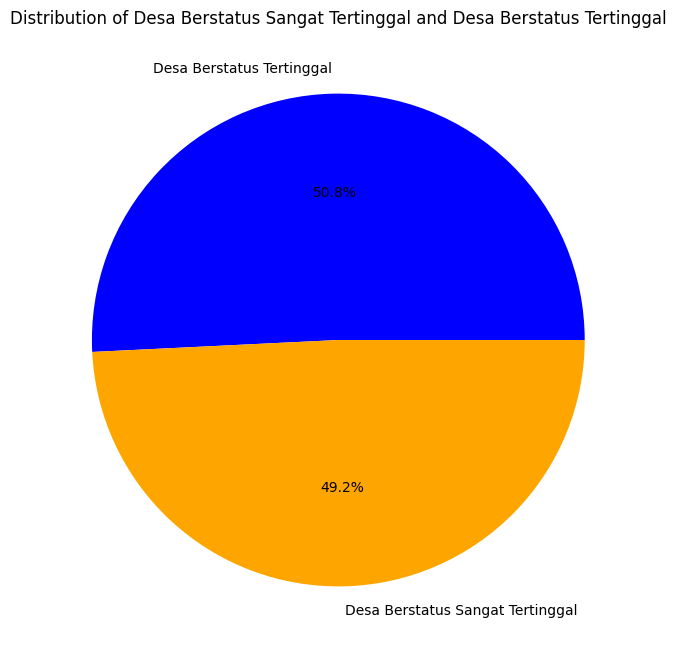

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '../Dataset/dataset_IDM.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')
class_labels = {0: 'Desa Berstatus Sangat Tertinggal', 1: 'Desa Berstatus Tertinggal'}
df['Status'] = df['Status'].map(class_labels)
class_counts = df['Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Desa Berstatus Sangat Tertinggal and Desa Berstatus Tertinggal')
plt.show()


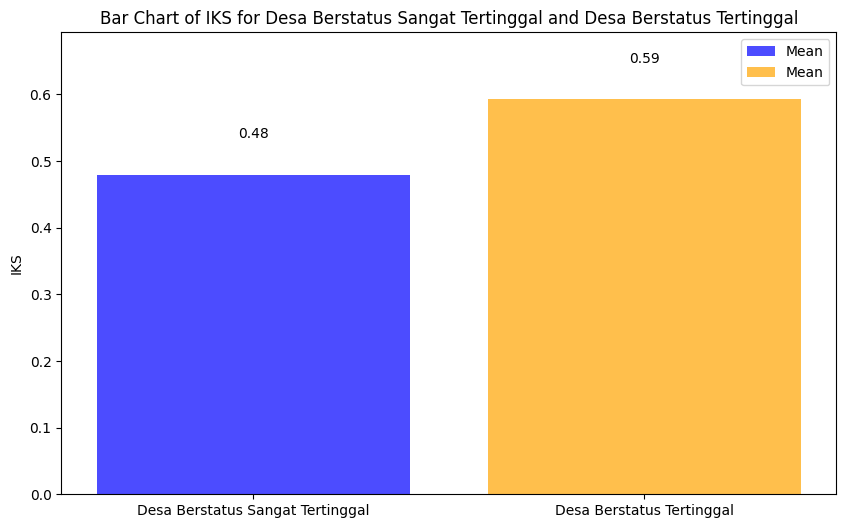

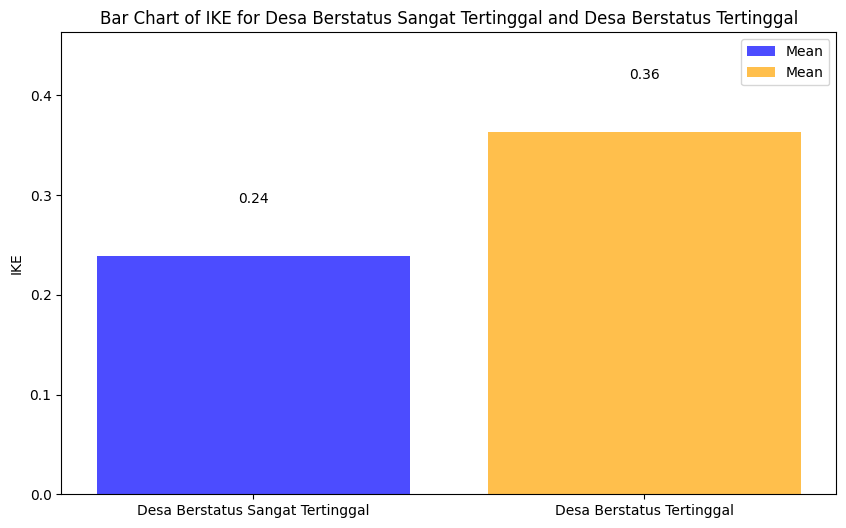

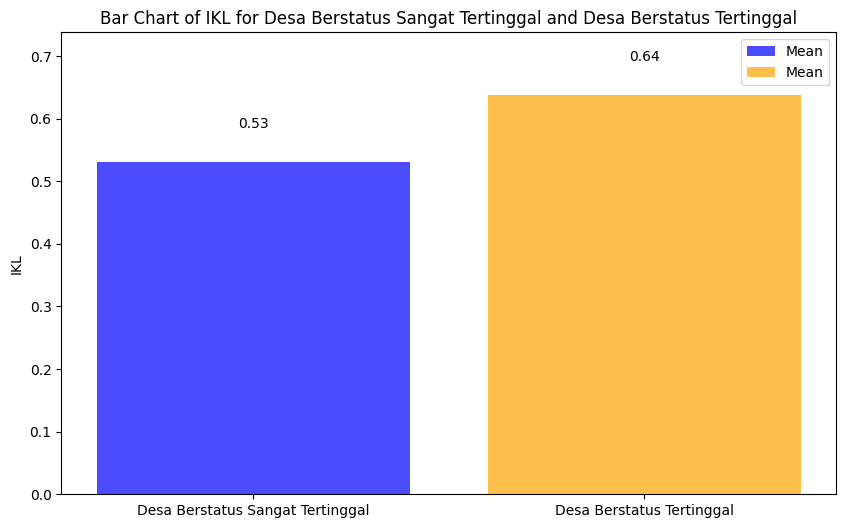

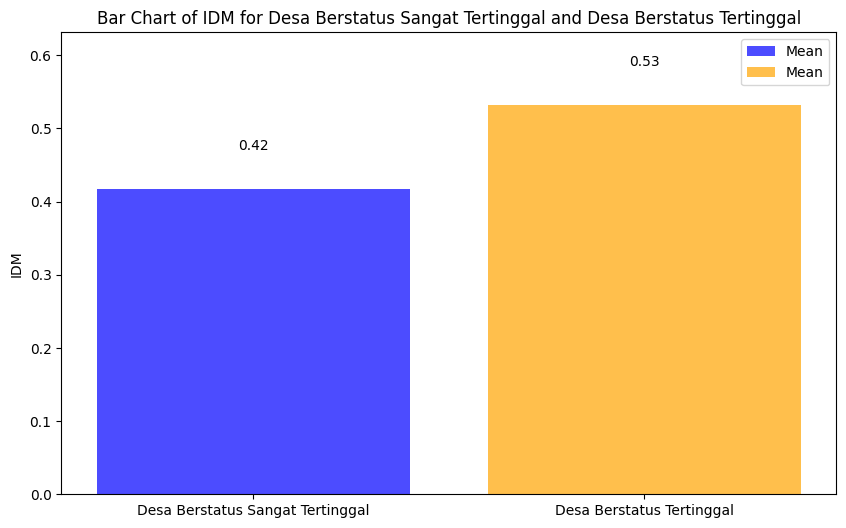

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'dataset_IDM.csv'
df = pd.read_csv(file_path, sep=';', decimal=',')

class_labels = {0: 'Desa Berstatus Sangat Tertinggal', 1: 'Desa Berstatus Tertinggal'}

df['Status'] = df['Status'].map(class_labels)
for feature in ['IKS', 'IKE', 'IKL', 'IDM']:
    plt.figure(figsize=(10, 6))
    
    # Bar Chart untuk Kelas 0
    mean_0 = df[df['Status'] == 'Desa Berstatus Sangat Tertinggal'][feature].mean()
    plt.bar('Desa Berstatus Sangat Tertinggal', mean_0, color='blue', alpha=0.7, label='Mean')
    plt.text('Desa Berstatus Sangat Tertinggal', mean_0 + 0.05, f'{mean_0:.2f}', ha='center', va='bottom', color='black')

    # Bar Chart untuk Kelas 1
    mean_1 = df[df['Status'] == 'Desa Berstatus Tertinggal'][feature].mean()
    plt.bar('Desa Berstatus Tertinggal', mean_1, color='orange', alpha=0.7, label='Mean')
    plt.text('Desa Berstatus Tertinggal', mean_1 + 0.05, f'{mean_1:.2f}', ha='center', va='bottom', color='black')

    plt.title(f'Bar Chart of {feature} for Desa Berstatus Sangat Tertinggal and Desa Berstatus Tertinggal')
    plt.ylabel(feature)
    plt.legend()
    
    # Adjust ylim to make room for text above bars
    plt.ylim(0, max(mean_0, mean_1) + 0.1)

    plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score
from pyswarms.single.global_best import GlobalBestPSO
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Added this line

file_path = 'dataset_IDM.csv'  
df = pd.read_csv(file_path, sep=';', decimal=',')


X = df[['IKS', 'IKE', 'IKL', 'IDM']]
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def train_model(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    return model, training_time


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions)
    precision_test = precision_score(y_test, predictions)
    return accuracy_test, precision_test


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Validasi Silang (5-fold)
    fold_accuracies = cross_val_score(clone(model), X_train, y_train, cv=5, scoring='accuracy')

    # Menentukan fold terbaik
    best_fold_index = fold_accuracies.argmax()
    best_model, training_time = train_model(clone(model), X_train, y_train)

    # Evaluasi pada data uji
    accuracy_test, precision_test = evaluate_model(best_model, X_test, y_test)
    
    # Menampilkan hasil masing-masing fold pada data latih
    print(f"\nHasil Masing-masing Fold pada Data Latih untuk Model {model.__class__.__name__}:")
    for fold, accuracy in enumerate(fold_accuracies, 1):
        print(f"Fold {fold}: Akurasi = {accuracy}")
    
    # Menampilkan keterangan fold terbaik untuk data uji
    print(f"\nModel dengan Fold Terbaik ({best_fold_index + 1}-fold) untuk Data Uji:")
    print(f"Akurasi (Data Uji): {accuracy_test}")
    print(f"Presisi (Data Uji): {precision_test}")
    print(f"Waktu Eksekusi Total: {training_time} detik")


lda_model = LinearDiscriminantAnalysis()  # Modified this line

# Contoh penggunaan untuk LDA
train_and_evaluate_model(lda_model, X_train, y_train, X_test, y_test)

# Instantiate a Naive Bayes model
naive_bayes_model = GaussianNB()

# Contoh penggunaan untuk Naive Bayes
train_and_evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)



Hasil Masing-masing Fold pada Data Latih untuk Model LinearDiscriminantAnalysis:
Fold 1: Akurasi = 0.9429657794676806
Fold 2: Akurasi = 0.9429657794676806
Fold 3: Akurasi = 0.9422053231939164
Fold 4: Akurasi = 0.9422053231939164
Fold 5: Akurasi = 0.9376425855513308

Model dengan Fold Terbaik (1-fold) untuk Data Uji:
Akurasi (Data Uji): 0.9373479318734793
Presisi (Data Uji): 0.8900747065101388
Waktu Eksekusi Total: 0.0 detik

Hasil Masing-masing Fold pada Data Latih untuk Model GaussianNB:
Fold 1: Akurasi = 0.9505703422053232
Fold 2: Akurasi = 0.9429657794676806
Fold 3: Akurasi = 0.938403041825095
Fold 4: Akurasi = 0.9482889733840304
Fold 5: Akurasi = 0.9460076045627377

Model dengan Fold Terbaik (1-fold) untuk Data Uji:
Akurasi (Data Uji): 0.9391727493917275
Presisi (Data Uji): 0.8980477223427332
Waktu Eksekusi Total: 0.00206756591796875 detik



Hasil Masing-masing Fold pada Data Latih untuk Model GaussianNB:
Fold 1: Akurasi = 0.9505703422053232
Fold 2: Akurasi = 0.9429657794676806
Fold 3: Akurasi = 0.938403041825095
Fold 4: Akurasi = 0.9482889733840304
Fold 5: Akurasi = 0.9460076045627377

Model dengan Fold Terbaik (1-fold) untuk Data Uji:
Akurasi (Data Uji): 0.9391727493917275
Presisi (Data Uji): 0.8980477223427332
Recall (Data Uji): 0.9928057553956835
F1 Score (Data Uji): 0.9430523917995445
Waktu Eksekusi Total: 0.0020241737365722656 detik

Confusion Matrix (Data Uji):
                   SANGAT TERTINGGAL  TERTINGGAL
SANGAT TERTINGGAL                716          94
TERTINGGAL                         6         828


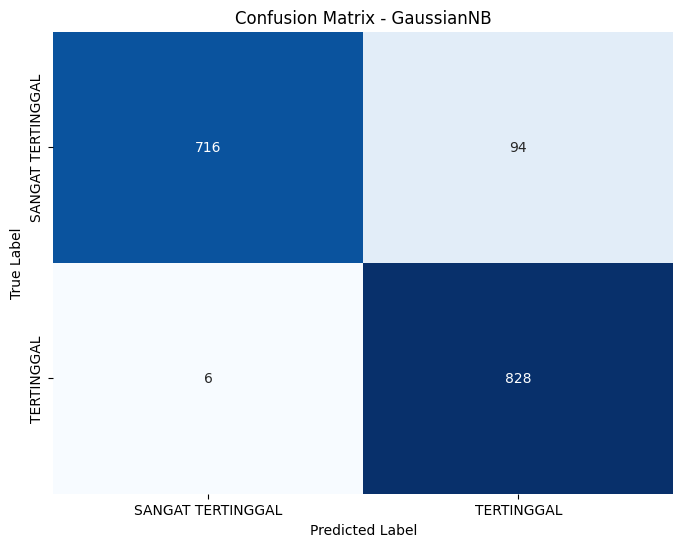

In [6]:


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pyswarms.single.global_best import GlobalBestPSO
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'dataset_IDM.csv'  
df = pd.read_csv(file_path, sep=';', decimal=',')


X = df[['IKS', 'IKE', 'IKL', 'IDM']]
y = df['Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def train_model(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    return model, training_time


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, predictions)
    precision_test = precision_score(y_test, predictions)
    recall_test = recall_score(y_test, predictions)
    f1_test = f1_score(y_test, predictions)
    confusion_matrix_test = confusion_matrix(y_test, predictions)
    return accuracy_test, precision_test, recall_test, f1_test, confusion_matrix_test


def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Validasi Silang (5-fold)
    fold_accuracies = cross_val_score(clone(model), X_train, y_train, cv=5, scoring='accuracy')

    # Menentukan fold terbaik
    best_fold_index = fold_accuracies.argmax()
    best_model, training_time = train_model(clone(model), X_train, y_train)

    # Evaluasi pada data uji
    accuracy_test, precision_test, recall_test, f1_test, confusion_matrix_test = evaluate_model(best_model, X_test, y_test)
    
    # Menampilkan hasil masing-masing fold pada data latih
    print(f"\nHasil Masing-masing Fold pada Data Latih untuk Model {model.__class__.__name__}:")
    for fold, accuracy in enumerate(fold_accuracies, 1):
        print(f"Fold {fold}: Akurasi = {accuracy}")
    
    # Menampilkan keterangan fold terbaik untuk data uji
    print(f"\nModel dengan Fold Terbaik ({best_fold_index + 1}-fold) untuk Data Uji:")
    print(f"Akurasi (Data Uji): {accuracy_test}")
    print(f"Presisi (Data Uji): {precision_test}")
    print(f"Recall (Data Uji): {recall_test}")
    print(f"F1 Score (Data Uji): {f1_test}")
    print(f"Waktu Eksekusi Total: {training_time} detik")

    # Menampilkan Confusion Matrix
    print("\nConfusion Matrix (Data Uji):")
    conf_matrix_df = pd.DataFrame(confusion_matrix_test, index=['SANGAT TERTINGGAL', 'TERTINGGAL'], columns=['SANGAT TERTINGGAL', 'TERTINGGAL'])
    print(conf_matrix_df)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['SANGAT TERTINGGAL', 'TERTINGGAL'], yticklabels=['SANGAT TERTINGGAL', 'TERTINGGAL'])
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Instantiate a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Contoh penggunaan untuk Gaussian Naive Bayes
train_and_evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)
